# CME193 - Assignment 1

In this assignment you will be learning about and implementing [Markov Chains](https://en.wikipedia.org/wiki/Markov_chain), if you have never heard  of them before, do not worry, this notebook will explain everything needed for the assignment.

## Markov chains
The best way to introduce what a Markov chain is with a simple example. Suppose you have a simple counter that you can set to any number between 1 and 10 (including 1 and 10). At every step you roll a standard 6 -sided die and depending on whether the rolled number is even or odd you either increment or decrement the counter. If you try to increment at 10, lets say it wraps around to 0 and similarly for trying to decrement at 0. Now you can play this game for multiple steps and record the counter value after every step, this is just a simple markov chain.

Here is an example evolution of the markov chain,
Start with counter at 1.
- Step 1 : Roll a 4, its even so increment the counter to 2.
- Step 2 : Roll a 2, its even so increment the counter to 3.
- Step 3 : Roll a 5, its odd so decrement the counter to 2.

etc.

A markov chain consists of a set of n states (in our example it was the 10 states of the counter) and a probabilistic rule to jump to another state every step (the dice rolls). Although in our simple example we had a similar rule for each state, you can have a different rule for each state. For example you may say that if you the counter is odd, dont roll a die, always increment, and follow the die for even states. The rule is always in the form of n probabilities that sum to one. Each probability indicates the chance that it jump to that state.

In our example the rule for state 1 can be represented by this numpy vector

In [1]:
import numpy as np
np.array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

The index in the array represents the state and the value represents the probability with which you will jump to that state. Similarly this is the rule for state 5

In [2]:
np.array([0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ])

array([0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ])

## Transition Matrix

The way to represent markov chains is with a transition matrix $T$ of size (n,n), where the column i will the rule vector for the state i ( Here we are assuming that the states ae numbered 0 to n-1 ).

Thus you can interpret the element $T_{ij}$ of the matrix as the probability you will jump to state i from the state j.

## Question 1

Write a function to return the transition matrix for the following markov chain, given the number of states as an argument.

The rule for the markov chain is as follows,

If current state is i
1. With probability 0.8, it goes to state i+1
2. With probability 0.2, it will fall back to state i = 0.
3. At state n-1, since it cannot go higher, with probability 1 it stays in the same state of n-1.

Intuitively, this markov chain behaves in the following way, at every step there is an 80% chance that it climbs up by 1 and 20% chance that it falls down completely, howeverif it does reach the final state n-1, it stays there forever

You are **not** allowed to use any for loops for this question, instead use numpy indexing to fill in your matrix. You can assume that n is atleast 3.

Hints:
1. First write your code in an empty cell for with a hardcoded n value, in this way you can quickly iterate and get the right answer first. Then copy it into the function.
2. You can use [Array indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html#index-arrays)

In [3]:
#YOUR CODE HERE
def transition_matrix(n):
    transition=np.zeros((n,n))
    transition[:-1,0]=0.2
    transition[-1,-1]=1
    transition[:-1,1:]=np.diag(0.8*np.ones(n-1))
    return transition.T # generally defined without transpose


In [5]:
#TESTING
transition_matrix(10)

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])

To test your function , check that the above returns 
```
array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])
```

## Question 2

Now we want to use the transtion matrix to know what are the probabilites of being in each state after running the markov chain for k steps. For example, for the above markov chain, I want to know after 30 steps, what is the probablity that I have reached the state n-1.

Luckily this is fairly easy to calculate, using matrix multiplication. An amazingly useful property of the transition matrix is as follows, if you have vector $p_j$ as the vector of probabilites after step $j$, then $p_{j+1}$ is given by the following matrix vector product.

$$ p_{j+1} =  Tp_j $$

We will not prove this result here, but if you spend some time thinking about what matrix multiplication is doing here, especially interpret it as taking a linear combination of columns then it should make sense.

Thus if someone gave you a probability distribution for the starting state as $p_0$, then the probability distribtion after $k$ steps is simply given by multiplying by the transition matrix k times

$$ p_{k} =  T^{k}p_0 $$

Implement a function which given an initial distribution `p0`, number of steps `k` and a transition matrix `tm`, it will return the distribution after k steps

In [6]:
#YOUR CODE HERE
def propagate(p0,k,tm):
    return np.dot(np.linalg.matrix_power(tm,k),p0)

In [8]:
#TESTING
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
pk = propagate(p0,30,tm)
pk

array([0.0816156 , 0.06787354, 0.05644353, 0.04694437, 0.03904617,
       0.03247669, 0.02701094, 0.02246264, 0.01867741, 0.6074491 ])

The above code should return :

```
array([0.0816156 , 0.06787354, 0.05644353, 0.04694437, 0.03904617,
       0.03247669, 0.02701094, 0.02246264, 0.01867741, 0.6074491 ])
```

## Question 3

Now use the above function to plot the probabilites at the end of each step for the first 10 steps in the same plot.
1. Create a transition matrix for n = 10
2. Create a vector which represents the initial state that you are in state 0 with probability 1.
3. Plot the probability distribution after each step for 10 steps in the same figure
4. Make sure you label the X and Y axis, and give the plot a title, save the plot in a file called "qsn3.png"

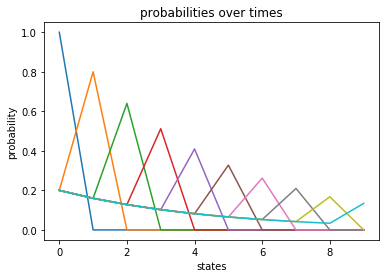

In [9]:
import matplotlib.pyplot as plt
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
for k in range(10):
    plt.plot(propagate(p0,k,tm))
plt.xlabel('states')
plt.ylabel('probability')
plt.title('probabilities over times')
plt.savefig('qsn3.png')

## Question 4
### Part a
Use the functions you implemented to calculate the following :

How many steps does it take for the probability of being in the final state to be atleast 0.5.

After each step the probability of being in the final state slowly increases. At some point this probability will cross 50%. What you need to calculate how many steps does it take to cross 50%.

Again use n=10 transition matrix and start from state 0.

Hints:
1. Use the while loop

In [11]:
p_k=p0
k=0
while p_k[-1]<0.5:
    k=k+1
    p_k=propagate(p0,k,tm)
k


24

### Part b
Convert the above Code into a function that computes the number of steps to 50% probability in the final state given `n` the size of the markov chain

In [12]:
#YOUR CODE HERE
def num_steps(n):
    tm = transition_matrix(n)
    p0 = np.zeros(n)
    p0[0] = 1
    p_k=p0
    k=0
    while p_k[-1]<0.5:
        k=k+1
        p_k=propagate(p0,k,tm)
    return k

### Part c
Compute and plot the number of steps required for $n$ ranging from 10 to 40.

Lookup the plotting function `plt.semilogy`and understand what it does, plot another graph of the number of steps using it.

What does the semilogy plot tell you?

Save the plots as "qsn4c.png" and "qsn4c_semilogy.png"

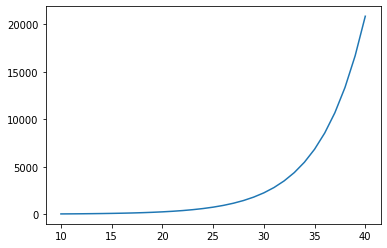

<Figure size 432x288 with 0 Axes>

In [16]:
number_steps_required=[num_steps(n) for n in range(10,41)]
plt.plot(range(10,41),number_steps_required)
plt.show()
plt.savefig('qsn4c.png')

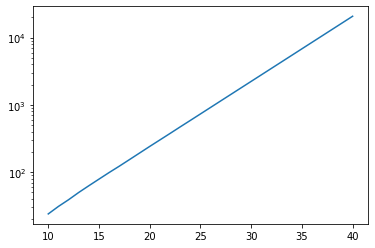

In [17]:

plt.semilogy(range(10,41),number_steps_required)
plt.savefig('qsn4c_semilogy.png')

## Question 5

Now we want to also compute some sample evolutions of the markov chains. What does this mean? We want a sequence of states drawn according to the rules of the markov chain. Thus we want to use randomness to choose what the next state is. Thus each call to the function will return a different answer, a new sample.

For example consider the markov chain we have been using, it climbs up with probabilty 80% or drops to 0 otherwise, once it reaches the last state, it is stuck there. Here is one such sample of 20 steps.

```[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9]```

Write a function that returns one such sample for each call. It should take the transition matrix `tm` ,number of steps `k`  and a starting state `s0` and return an array of size `k+1` of states (including the starting state).

In [18]:
import numpy.random as rnd

In [19]:
#YOUR CODE HERE
def sample(tm, k, s0):
    sample=[s0]
    n=len(tm)
    for _ in range(k):
        sample.append(int(np.random.choice(n,p=tm[:,sample[-1]])))
    return sample

Use the below code to test out some of the samples, it samples 20 trajectories of the markov chain and plots them. The plot should show that almost all or all the trajectories would ahve reached the final state by the end. Save this graph as "qsn5.png".

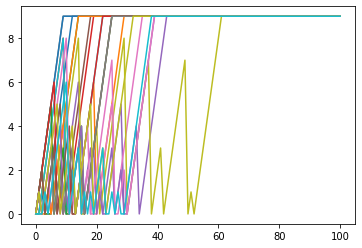

In [83]:
#TESTING
import matplotlib.pyplot as plt
tm = transition_matrix(10)
k = 20
s0 = 0

for i in range(20):
    states = sample(tm, 100, s0)
    plt.plot(states)

plt.savefig("qsn5.png")

## Question 6

Since the states are roughly being incremented by 1 or falling to 0, we want to know what rate of progress looks like on average. 

1. Create a transition matrix for n = 25
2. Sample 1000 trajectories of 100 steps using the sample function you wrote above.
3. Compute the average state(over the 1000 samples) at each time step.
4. Plot the average state vs time steps and save it as "qsn6.png"

Hints:
1. You should see a plot where the average climbs quickly and then steadily increases slowly till the end


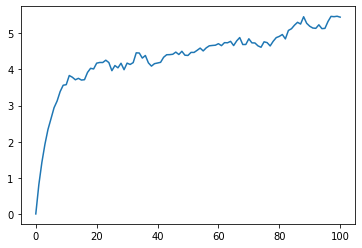

In [84]:
n=25
tm=transition_matrix(n)


means=np.array([sample(tm, 100, s0=0) for _ in range(1000)])
plt.plot(range(101),means.mean(axis=0))
plt.savefig("qsn6.png")

## Question 7
We want to now verify if our sampling implementation is consistent with our implementation of computing the probability distribution.

1. Create a transition matrix for n = 25
2. Sample 1000 trajectories of 100 steps using the sample function you wrote above, record the last state for each trajectory in a separate list.
3. Plot a histogram of final states
4. Use the function `propagate` that you wrote to compute the theoretical distribution after 100 steps
5. Plot the expected distribution in the same plot and verify that it matches with the histogram.
6. Save the plot as "qsn7.png"

Hints:
1. For the the histogram you can set the bins manually to be one bin for each state. You can do this by setting bin boundaries to be ... 2.5, 3.5, ... , in this way the state 3 will have a bin between 2.5 and 3.5

2. The propagate functions returns a probability distribution, you need to multiply it with the number of samples for it to be comparable to the histogram

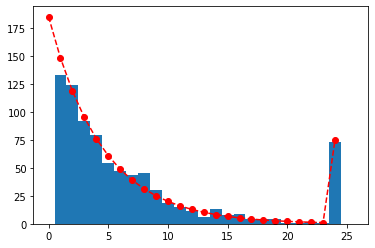

In [96]:
n=25
samples=1000
tm=transition_matrix(n)
lasts=np.array([sample(tm, 100, s0=0)[-1] for _ in range(samples)])
plt.hist(lasts,bins=np.arange(26)+0.5)
p_end=propagate(p0,100,tm)
plt.plot(p_end*samples,'ro--')
plt.savefig('qsn7.png')


# Submission Instructions

You need to submit the following in canvas
1. This notebook with the code filled in for each question
2. The figures
    1. qsn3.png
    2. qsn4c.png and qsn4c_semilogy.png
    3. qsn5.png
    4. qsn6.png
    5. qsn7.png